In [1]:
# Import Libraries
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
# Function to normalize the data
def normalize(X):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    """
    mu = np.mean(X, axis=0)             # Compute the mean of X
    std = np.std(X, axis=0)             # Compute the std of X
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = (X-mu)/std_filled            # Compute the normalized data Xbar
    return Xbar, mu, std                #return normalized data, mean and std


In [3]:
# Load dataset
X = genfromtxt('data.csv',delimiter=',')
Xbar, mu, std = normalize(X)            #Call the normalize function
print('Shape of Xbar = ',Xbar.shape)
print('Shape of mean = ',mu.shape)
print('Shape of std  = ',std.shape)

Shape of Xbar =  (99, 5)
Shape of mean =  (5,)
Shape of std  =  (5,)


In [4]:
S=0                                    #define covariance matrix
pd.DataFrame(Xbar)                                    
S = np.matmul(Xbar.T, Xbar)            #calculate covariance matrix=X^T*X
print('The shape of covariance matrix = ',S.shape)
print('The trace of covariance matrix = ',np.trace(S))

The shape of covariance matrix =  (5, 5)
The trace of covariance matrix =  495.0


In [5]:
#verify covariance matrix its trace with the trace found above
from sklearn.preprocessing import StandardScaler#try

standardized_data = StandardScaler(with_mean=True,with_std=True)
standardized_data = standardized_data.fit_transform(Xbar)
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print("The covariance matrix : \n")
print(covar_matrix)
print ( "\nThe shape of covariance matrix = ", covar_matrix.shape)
print("The trace of covariance matrix = ",np.trace(covar_matrix))

The covariance matrix : 

[[99.         98.41673304 20.25065593 42.65365885 91.44525306]
 [98.41673304 99.         20.09554752 41.9844328  90.63699131]
 [20.25065593 20.09554752 99.         24.33041975 32.16444645]
 [42.65365885 41.9844328  24.33041975 99.         47.23449827]
 [91.44525306 90.63699131 32.16444645 47.23449827 99.        ]]

The shape of covariance matrix =  (5, 5)
The trace of covariance matrix =  495.0


In [6]:
#Function to compute sorted eigen values and eigen vectors
def eig_sorted(S):
    """Compute the eigenvalues and corresponding eigenvectors 
        for the covariance matrix S.
    Args:
        S: ndarray, covariance matrix
    
    Returns:
        (eigvals, eigvecs): ndarray, the eigenvalues and eigenvectors
    """
    eigvals, eigvecs = np.linalg.eig(S)  # calculate eigenvalues and eigen vectors
    vals = eigvals.argsort()[::-1]       # sort eigen values and corresponding eigen vectors in descending order
    eigvals = eigvals[vals]
    eigvecs = eigvecs[:,vals]
    return (eigvals,eigvecs)             # return the eigenvalues and corresponding eigenvectors

In [7]:
#Function to compute unsorted eigen values and eigen vectors
def eig_unsorted(S):
    """Compute the eigenvalues and corresponding eigenvectors 
        for the covariance matrix S.
    Args:
        S: ndarray, covariance matrix
    
    Returns:
        (eigvals, eigvecs): ndarray, the eigenvalues and eigenvectors
    """
    eigvals, eigvecs = np.linalg.eig(S)  # calculate eigenvalues and eigen vectors
    return (eigvals,eigvecs)             # return the eigenvalues and corresponding eigenvectors

In [8]:
# calculate B for num_components = 3
eigvals, eigvecs = eig_sorted(S)
eigvals_u, eigvecs_u = eig_unsorted(S)
num_components = 3
B=eigvecs
B = np.stack(eigvecs[:,:num_components])
print ( "The shape of B = ", B.shape)
print("The trace of B = ",np.trace(B))

The shape of B =  (5, 3)
The trace of B =  0.08937304699746162


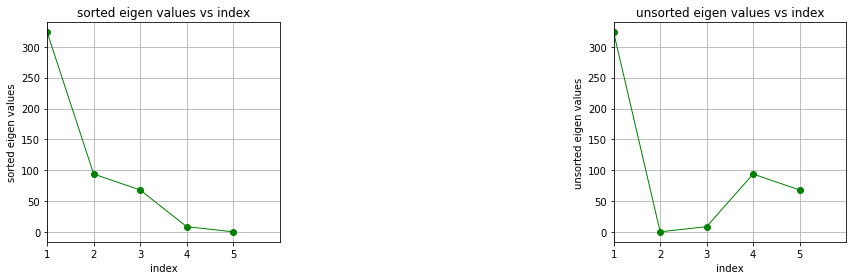

In [9]:
#Plot sorted eigen values
%matplotlib inline

fig=plt.figure(figsize=(12,4))
ax = plt.subplot(1,3,1)
ax.plot(np.append(np.roll(eigvals,1),eigvals[4]),'-go',linewidth=1);
ax.set_xlim(1,6);

plt.xlabel('index')
plt.ylabel('sorted eigen values')
plt.title('sorted eigen values vs index')
plt.xticks(np.arange(1,6,1))
plt.grid()


ax = plt.subplot(1,3,3)
ax.plot(np.append(np.roll(eigvals_u,1),eigvals_u[4]),'-go',linewidth=1);
ax.set_xlim(1,6);
plt.title('unsorted eigen values vs index')
plt.xlabel('index')
plt.ylabel('unsorted eigen values')
plt.xticks(np.arange(1,6,1))
plt.grid()
plt.tight_layout()
plt.show()


In [10]:
#Function to compute projection matrix P
def projection_matrix(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = np.matmul(B,B.T) # compute the projection matrix B*B^T
    return P 


In [11]:
#Function to compute PCA
def PCA(Xbar, num_components):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
           and N is the number of datapoints
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
        
    """
    #Xbar, mu, std = normalize(X)                # compute normalize data
    S = np.matmul(Xbar.T,Xbar)                  # compute covariance matrix
    eigvals, eigvecs = eig_sorted(S)            # compute eigen values and eigen vectors
    var=eigvals[:num_components].sum()          # compute variance 
    B = np.stack(eigvecs[:,:num_components])    # compute matrix B
    P = np.matmul(B,B.T)                        # compute projection matrix
    X_reconstruct = np.matmul(P,Xbar.T)
    X_reconstruct = X_reconstruct.T
    return X_reconstruct,var                    # return the reconstruction of X

In [12]:
#Function to compute PCA
def PCA_unsorted(Xbar, num_components):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
           and N is the number of datapoints
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
        
    """
    #Xbar, mu, std = normalize(X)                # compute normalize data
    S = np.matmul(Xbar.T,Xbar)                  # compute covariance matrix
    eigvals, eigvecs = eig_unsorted(S)          # compute eigen values and eigen vectors
    var=eigvals[:num_components].sum()          # compute variance 
    B = np.stack(eigvecs[:,:num_components])    # compute matrix B
    P = np.matmul(B,B.T)                        # compute projection matrix
    X_reconstruct = np.matmul(P,Xbar.T)
    X_reconstruct = X_reconstruct.T
    return X_reconstruct,var                    # return the reconstruction of X

In [13]:

def mse(predict, actual):
    """
    Args:
        predict: Predicted values
        actual : actual values
    Returns:
        np.square(predict - actual).sum(axis=1).mean(): the mean squared error (MSE)
        
    """
    mse=np.square(predict - actual).sum(axis=1).mean()
    return mse

In [14]:
loss = []
loss_unsorted =[]
reconstructions = []
variance=[]
# iterate over different numbers of principal components, and compute the MSE & varianace
for num_component in range(1, 6):
    reconst,var = PCA(Xbar, num_component)
    error = mse(reconst, Xbar)
    reconstructions.append(reconst)
    loss.append((num_component, error))
    variance.append((num_component, var))
    reconst_unsorted,var_unsorted = PCA_unsorted(Xbar, num_component)
    error_unsorted = mse(reconst_unsorted, Xbar)
    loss_unsorted.append((num_component, error_unsorted))

    
reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + mu # "unnormalize" the reconstructed image
loss = np.asarray(loss)
loss_unsorted = np.asarray(loss_unsorted)
variance = np.asarray(variance)
print('Shape of loss = ',loss.shape)
print('Shape of variance = ',variance.shape)

Shape of loss =  (5, 2)
Shape of variance =  (5, 2)


In [15]:
import pandas as pd
# create a table showing the number of principal components and MSE
pd.DataFrame(loss).head()

,0,1
0,1.0,1.735383e+00
1,2.0,7.854925e-01
2,3.0,9.608802e-02
3,4.0,5.631709e-03
4,5.0,3.011837e-30


In [16]:
import pandas as pd
# create a table showing the number of principal components and variance
pd.DataFrame(variance).head()

,0,1
0,1.0,323.197098
1,2.0,417.236243
2,3.0,485.487286
3,4.0,494.442461
4,5.0,495.000000


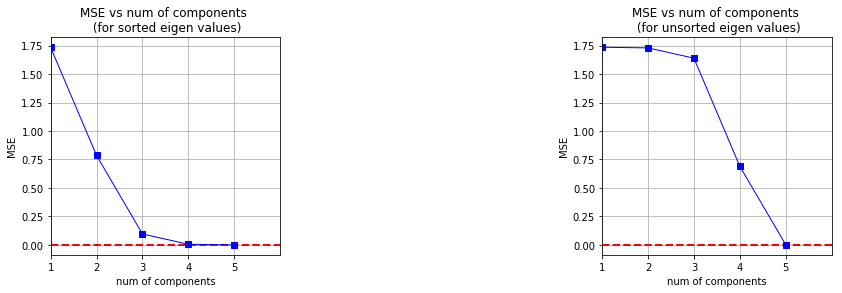

In [17]:
# Plot MSE vs num of components
%matplotlib inline
fig=plt.figure(figsize=(14,4))
ax = plt.subplot(131)
ax.axhline(0, linestyle='--', color='r', linewidth=2)
ax.plot(loss[:,0], loss[:,1],'-bs',linewidth=1);
ax.set_xlim(1,6);
plt.xlabel('num of components')
plt.ylabel('MSE')
plt.title('MSE vs num of components \n (for sorted eigen values)')
plt.xticks(np.arange(1,6,1))
plt.grid()

ax = plt.subplot(133)
ax.axhline(0, linestyle='--', color='r', linewidth=2)
ax.plot(loss_unsorted[:,0], loss_unsorted[:,1],'-bs',linewidth=1);
ax.set_xlim(1,6);
plt.xlabel('num of components')
plt.ylabel('MSE')
plt.title('MSE vs num of components \n (for unsorted eigen values)')
plt.xticks(np.arange(1,6,1))
plt.grid()
plt.show()


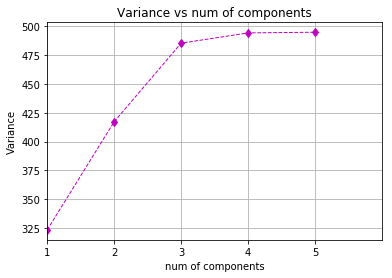

In [19]:
# Plot Variance vs num of components
%matplotlib inline
plt.xlabel('num of components')
plt.ylabel('Variance')
plt.title('Variance vs num of components')
ax = plt.subplot(111)
ax.plot(variance[:,0], variance[:,1],'--md',linewidth=1);
ax.set_xlim(1,6);
plt.xticks(np.arange(1,6,1))
plt.grid()
plt.show()